# Introduction
In Part I, we acquired our data, checked for missing values, and combined three different DataFrames into one.

In this Part, here's what you will do:
<ol><li>Import the combined CSV from Part I</li><li>Perform univariate analyses on the features</li><li>Perform bivariate analyses on selected pairs of features</li></ol>

Useful readings on visualization: 
<a href = "https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed">Introduction to Data Visualization in Python</a> (run it in Incognito Mode if you face the paywall)

Visualization is an important part of understanding your data, and if you're not used to it you should give it a read!

### Step 1: Import the following libraries
- pandas as pd
- matplotlib.pyplot as plt
- seaborn as sns
- scipy.stats

In [1]:
# Step 1: Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

### Step 2: Read the CSV from Part II as a DataFrame
Read the combined CSV as a DataFrame.

This is the DataFrame that you should expect

1. 456,548 rows
2. 15 columns

In [3]:
# Step 2: Read the CSV from Part I
raw_df = pd.read_csv('merged_data.csv')
raw_df.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


## Univariate analysis
In this Section, we will explore the data through visualizations to get an intuitive understanding of how your data's looking.

### Step 3: Perform UA on checkout_price with a histogram
Let's take a look at the distribution of checkout_price first with a histogram.

checkout_price is the final price including discount, taxes & delivery charges.

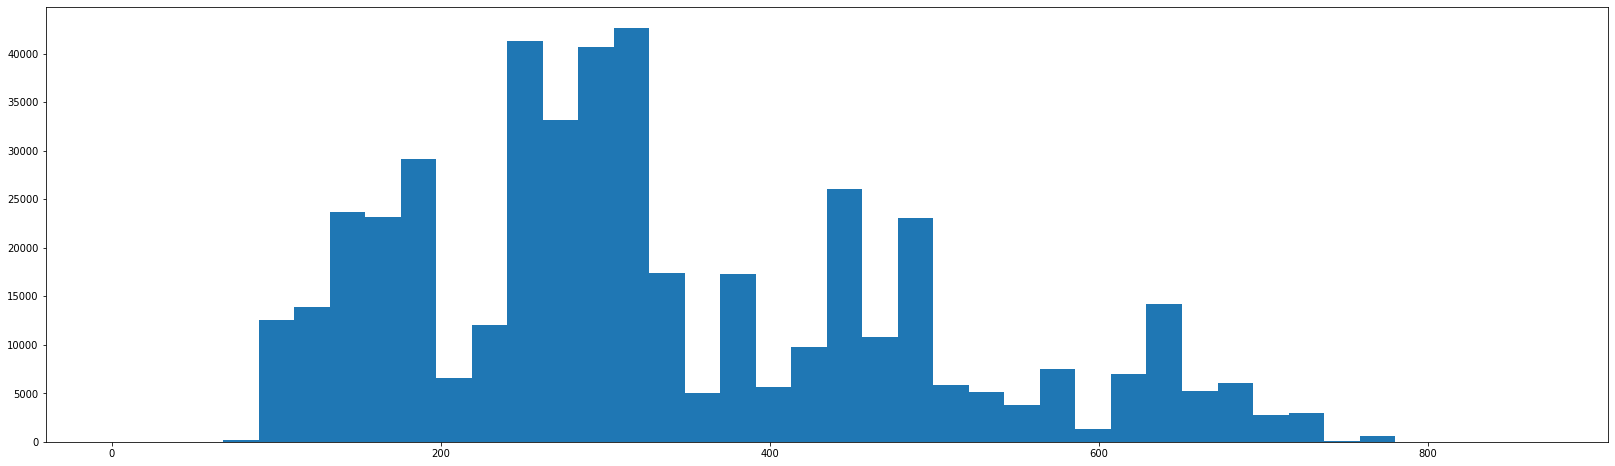

In [4]:
# Step 3: Plot a histogram using checkout_price
plt.figure(figsize=(28,8))
plt.hist(raw_df['checkout_price'],bins=int(800/20)) #can use plt.hist or sns.distplot. But plt.hist is simpler for simple histograms)
#sns.distplot(raw_df['checkout_price'], kde = False, norm_hist=False) #False norm_hist so that y axis will show as count instead of prob density 
#sns.countplot(y='checkout_price',data=raw_df)
plt.show()

# Observations from above query
- Most checkout prices are concentrated between ~40 to ~780
- Outlier that exists for prices between 10 to 20 AND at ~860
- Most checkout prices exists between ~250 to ~350


### Step 4: Perform UA on base_price with a histogram
After that, let's take a look at the base_price as well.

base_price is the base_price of the meal.

In [53]:
raw_df[raw_df['base_price'] > 200]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454186,1226158,141,51,1847,195.00,194.00,0,0,42,638,56,TYPE_A,7.0,Soup,Thai
454187,1083519,142,51,1847,194.00,194.00,0,0,69,638,56,TYPE_A,7.0,Soup,Thai
454188,1446009,143,51,1847,194.00,194.00,0,0,41,638,56,TYPE_A,7.0,Soup,Thai
454189,1470303,144,51,1847,194.00,196.00,0,0,41,638,56,TYPE_A,7.0,Soup,Thai


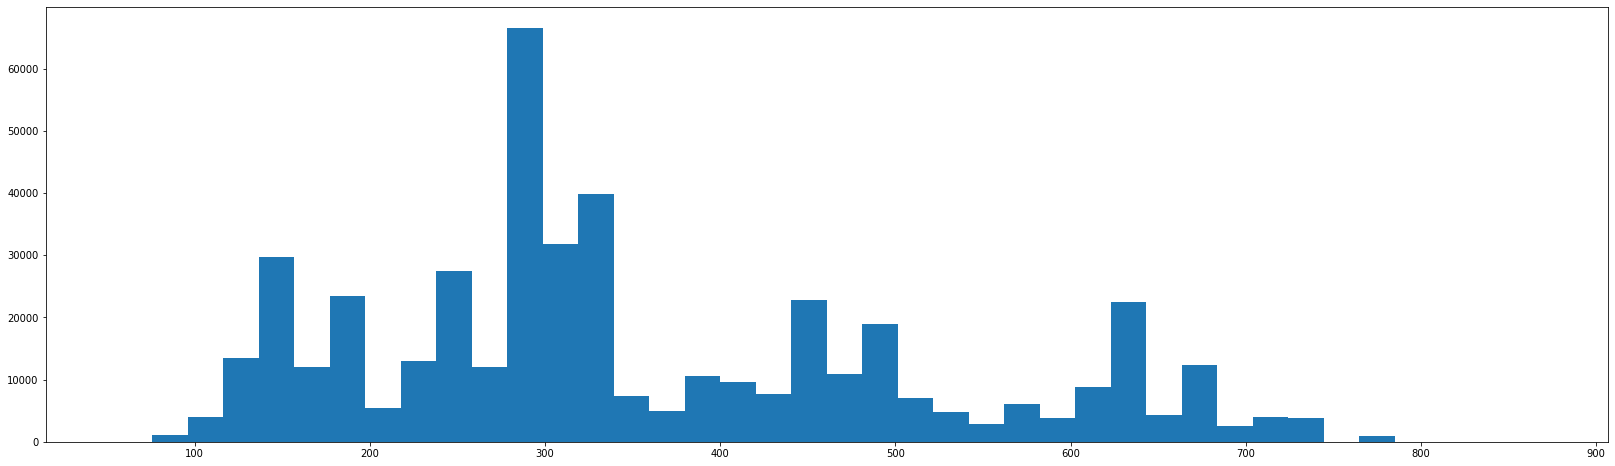

In [56]:
# Step 4: Plot a histogram using base_price
plt.figure(figsize=(28,8))
plt.hist(raw_df['base_price'], bins=int(800/20))
#sns.countplot(x='base_price', data=raw_df)
plt.show()

# Observations from above query
- Most checkout prices fall between 150 to 780
- Outlier at 90 AND 810
- Most checkout prices are at ~280 and 350


### Step 5: Perform UA on meal_id with value counts
How many kinds of meals are there in the dataset? What can you comment about the distribution of meal_ids?

We can answer this with a value counts method.

In [60]:
# Step 5: Perform value_counts with meal_id
#raw_df['meal_id'].head(10)
raw_df['meal_id'].value_counts()

2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445     9727
2126     9705
1216     9695
2304     9676
2569     9459
2492     9382
1525     9359
2490     9247
2444     9097
2139     8899
2577     8667
2306     8294
2867     8092
1247     7184
1902     6748
1770     6682
1311     4682
1803     4674
1571     4511
1438     4385
2494     4206
1198     4206
1847     4084
2956     3319
2104     2357
Name: meal_id, dtype: int64

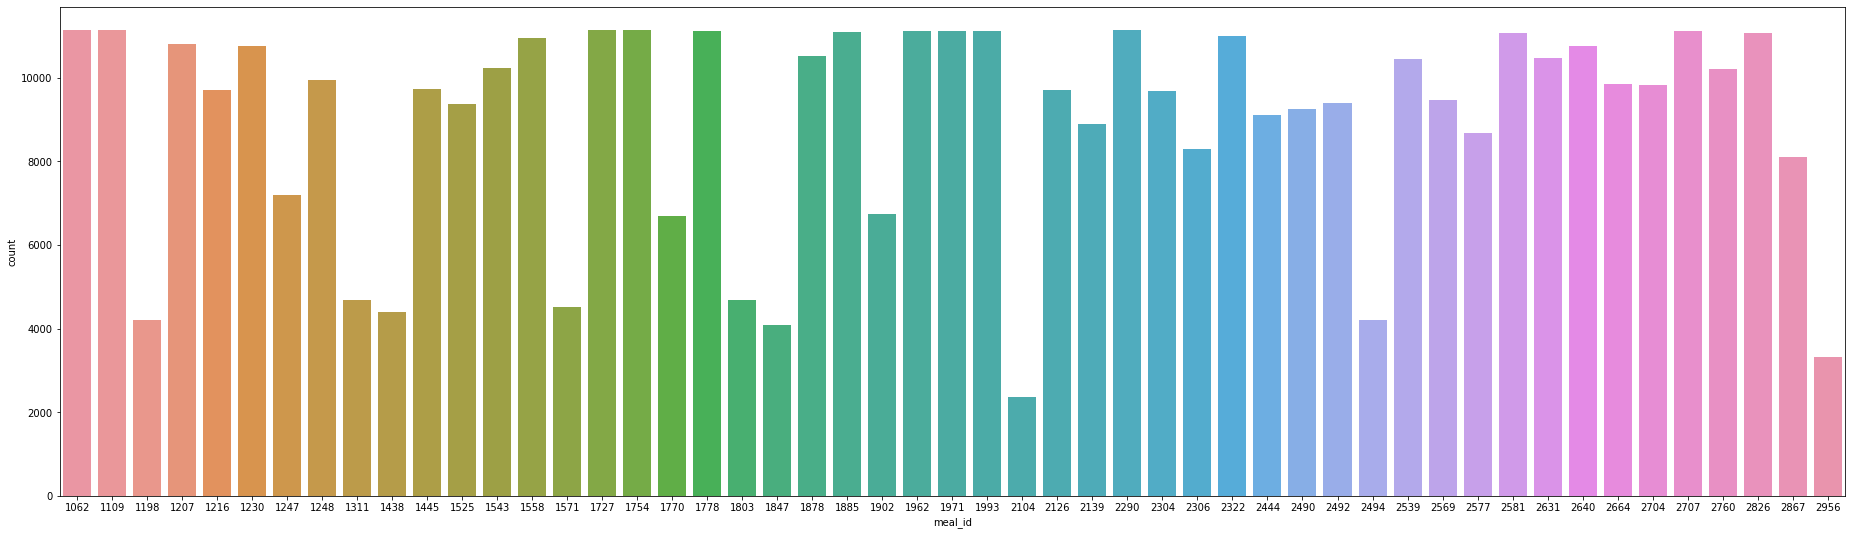

In [69]:
plt.figure(figsize=(32,9))
sns.countplot(raw_df['meal_id'])
plt.show()

# Observations from above query
- ~50 types of meals
- There are about ~12 types of meals that have below average counts i.e. sales can be improved.
- The bottom 9 meal ids' sales count is very underwhelming as each is less than half of the #30th meal id

### Step 6: Perform UA on center_id with value counts
After looking at meal_id, let's look at center_id. 

What are the centers in this datase, and how does the distribution look like? 

Answer this with a value_counts method.

In [63]:
# Step 6: Perform value_counts on center_id
raw_df['center_id'].value_counts()

13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

### Optional: Plot a countplot with center_id
We can also visually inspect the distribution of center_id with a countplot from seaborn.

If the plot looks crowded, don't forget you can change the size of the plot as well! 

We recommend 32 x 9 plot size.

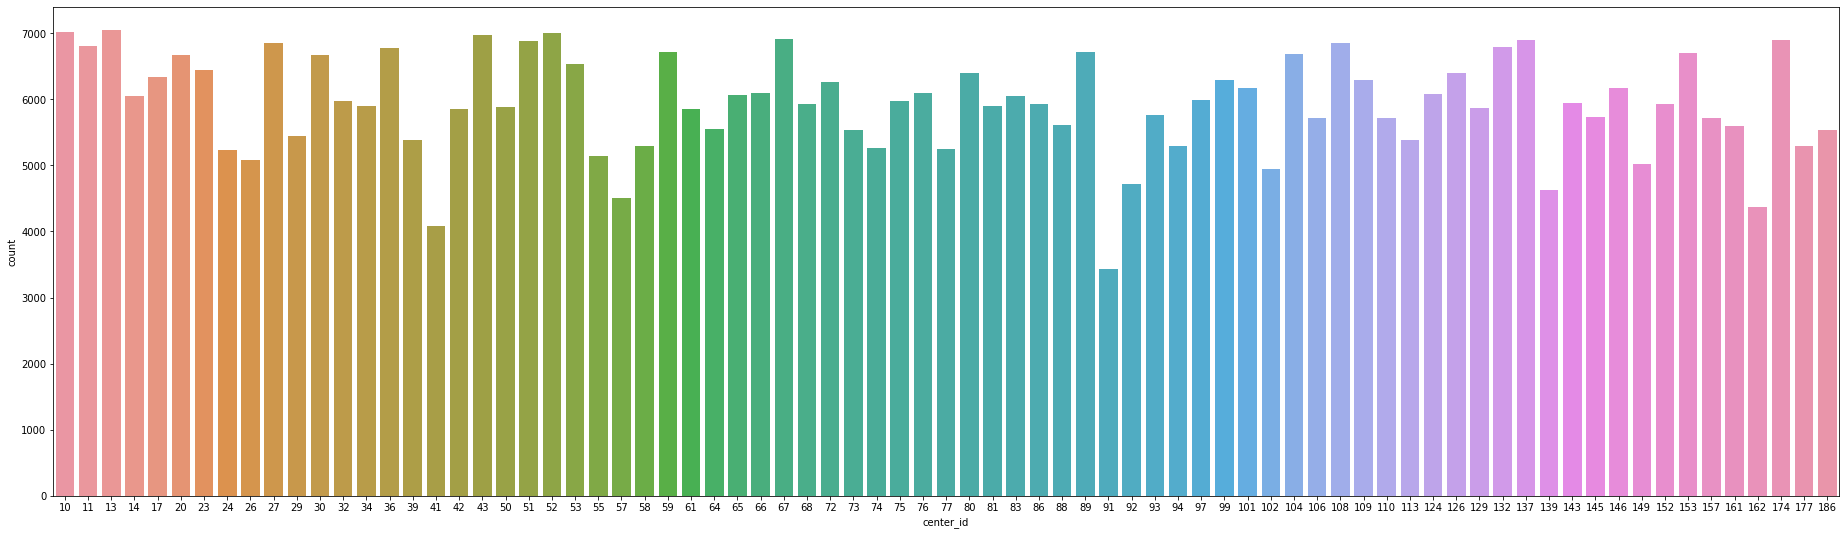

In [65]:
# Plot a countplot with center_id
plt.figure(figsize=(32,9))
sns.countplot(raw_df['center_id'])
plt.show()

# Observations from above query
- There are 77 centers
- There are ~6 centers that have lower counts i.e. can be better utilized
- Least used center_id is 50% less utilized than top 5

### Step 7: Perform UA on emailer_for_promotion with a countplot
Seems like some of the centers sent emailers for promotion of their meals. 

Let's take a look how frequently these emailers are sent with a countplot. 

In [72]:
# Step 7: Plot a histogram using emailer_for_promotion
# Take a sample first to see what type of values are there
raw_df['emailer_for_promotion'].sample(10)

269335    0
141215    0
327565    0
311872    0
321711    0
432930    0
329489    0
213678    0
389366    0
221806    0
Name: emailer_for_promotion, dtype: int64

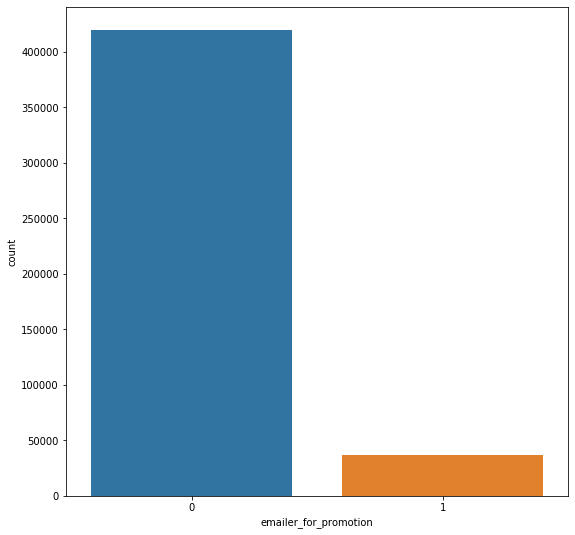

In [74]:
plt.figure(figsize=(9,9))
sns.countplot(raw_df['emailer_for_promotion'])
plt.show()

# Observations from above query
- <50k emailers were sent out out of >400k records i.e. 12.5% had emailers
- Emailers are an exception instead of a rule
- Did these emailers help sales? Need to do bi-variate analysis with center_id

### Step 8: Perform UA on homepage_featured with a countplot
Some centers feature their meals on their homepages. 

How frequently do features happen? Let's find out with a countplot.

In [75]:
# Step 8: Plot a histogram using homepage_featured
# Get sample of data
raw_df['homepage_featured'].sample(5)

375772    0
217722    1
131999    0
137802    0
89281     0
Name: homepage_featured, dtype: int64

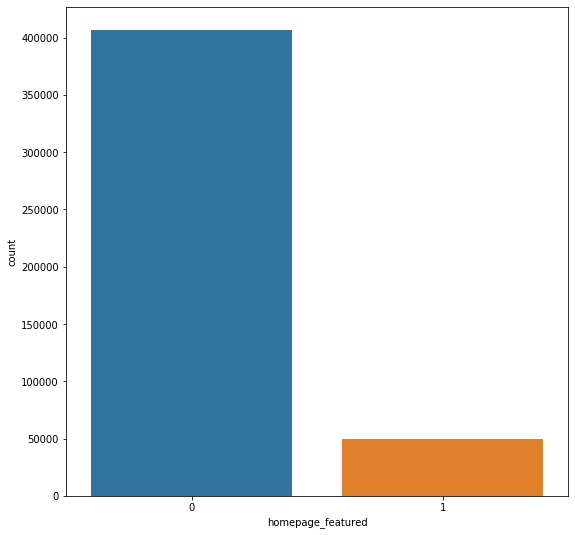

In [76]:
plt.figure(figsize=(9,9))
sns.countplot(raw_df['homepage_featured'])
plt.show()

# Observations from above query
- <50k were featured out out of >400k records i.e. 12.5% meals were featured
- Being featured is an exception instead of a rule
- Did these features help sales? Need to do bi-variate analysis with meal_id, center_id.

### Step 9: Perform UA on city_code with a value count
How many cities are there in the dataset, and what are they? 

The cities are anonymized, but it's still useful to observe the distribution. 

Examine city_code with with a value count.

In [77]:
# Step 9: Plot a histogram using city_code
raw_df['city_code'].sample(5)

52687     590
336436    590
133542    590
412061    604
385424    699
Name: city_code, dtype: int64

In [78]:
raw_df['city_code'].value_counts()

590    54746
526    43525
638    20047
522    13459
517    13109
604    13062
699    12098
647    11833
576    11456
614    11332
676    11177
593    10804
685     6993
700     6891
713     6853
579     6843
679     6801
456     6716
703     6706
698     6434
577     6389
599     6296
596     6293
648     6090
602     6057
659     6053
654     6041
628     5983
651     5975
562     5938
615     5892
556     5885
473     5855
561     5846
461     5763
620     5732
609     5721
675     5715
485     5712
658     5591
553     5547
649     5528
680     5379
683     5296
695     5296
632     5292
702     5264
515     5085
478     5021
693     4627
541     4501
Name: city_code, dtype: int64

### Optional: Plot city_code with a countplot
Similarly, we can visualize the distribution of counts of the cities with a countplot. 

There are quite a few cities, so don't forget to change the figure size.

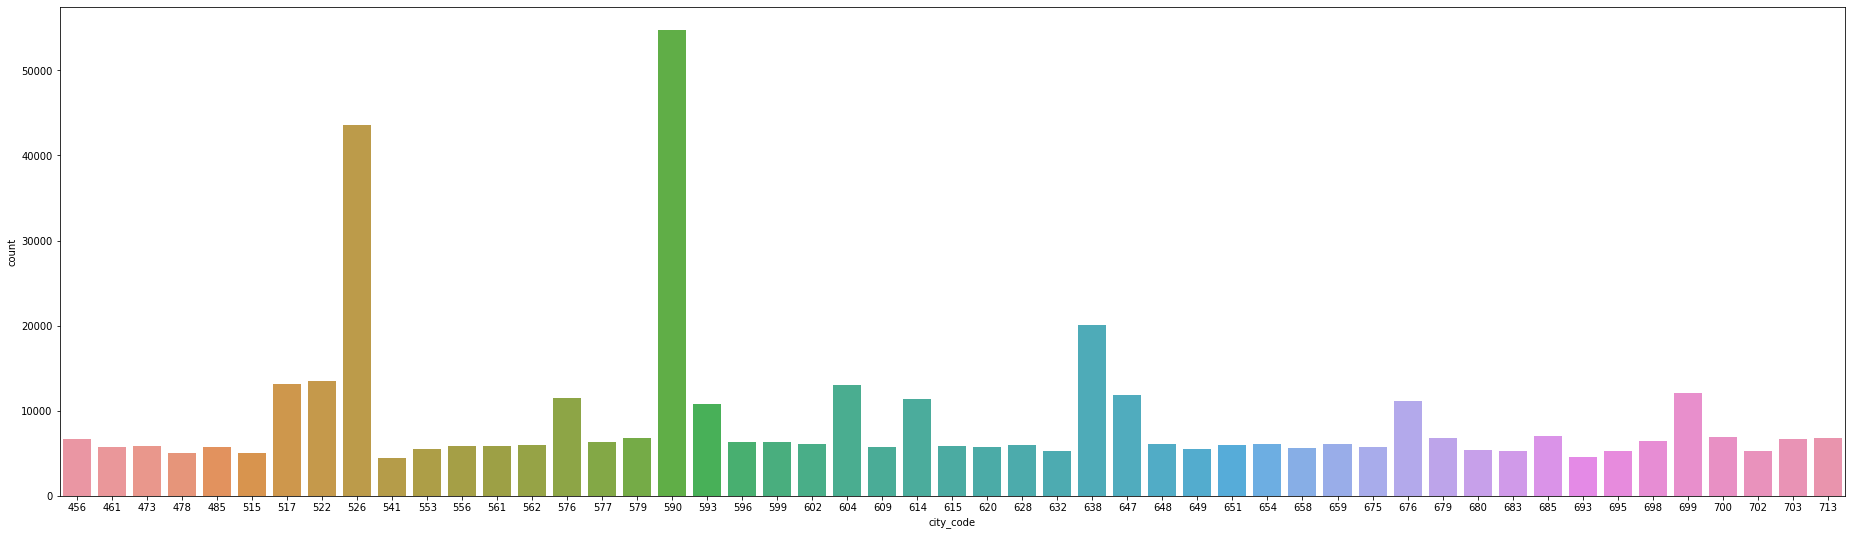

In [79]:
# Plot city_code with a countplot
plt.figure(figsize=(32,9))
sns.countplot(raw_df['city_code'])
plt.show()

# Observations from query above
- Bulk of transactions are done in city 590 & 526
- 10 more cities have above-avg transactions

### Step 10: Perform UA on region_code with a countplot
There are a lot of cities, but how many regions are there? 

Let's examine this with a countplot.

In [85]:
# Step 10: Plot a histogram using region_code
raw_df['region_code'].value_counts()

56    191228
34    116713
77     94612
85     30283
23      6434
71      6293
93      5721
35      5264
Name: region_code, dtype: int64

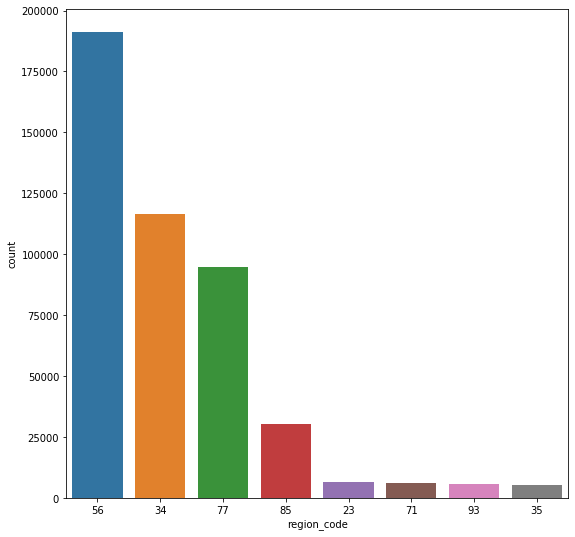

In [87]:
plt.figure(figsize=(9,9))
sns.countplot(raw_df['region_code']
              , order = raw_df['region_code'].value_counts().index)
plt.show()

# Observations from above query
- Only 8 regions
- Most transactions come from 56, 34, 77

### Step 11: Perform UA on center_type with a countplot
How about the type of centers used in the deliveries?

We have three types, but let's take a look at the number of each type of centers there are out there with a countplot.

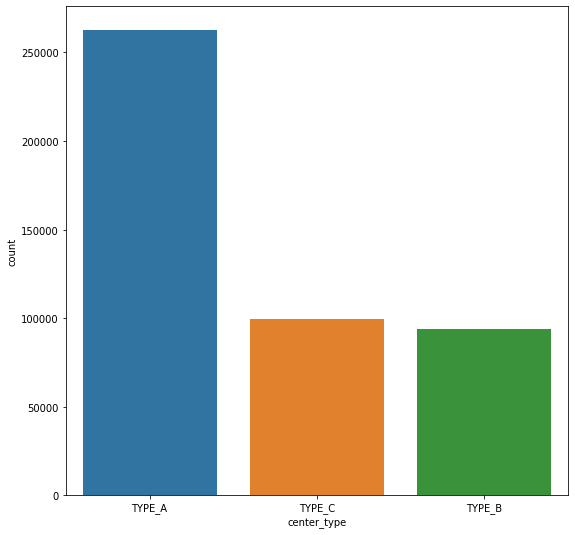

In [89]:
# Step 11: Plot a countplot using center_type
plt.figure(figsize=(9,9))
sns.countplot(raw_df['center_type']
             ,order = raw_df['center_type'].value_counts().index)
plt.show()

# Observations from above query
- Only 3 types of centers
- ~62.5% orders are made from type A center

### Step 12: Perform UA on op_area with a histogram
We even have information on the area of operation for the fulfilment centers, i.e. op_area.

Use a histogram to visualize the distribution of operation areas for the centers.

In [93]:
# Step 12: Plot a histogram using op_area
# Take a random sample
raw_df['op_area'].sample(5)
raw_df['op_area'].value_counts()

4.0    52548
3.9    48533
3.8    40080
4.4    26060
4.5    25688
2.8    25503
4.1    23346
7.0    20686
4.8    18648
3.4    17258
3.6    16821
5.1    13366
4.2    12608
2.7    12430
3.0    11184
2.0     9512
6.7     7046
6.3     7015
5.6     6993
3.7     6801
3.5     6666
3.2     6333
5.0     6164
5.3     6053
4.6     5983
4.7     5975
2.4     5021
2.9     4712
1.9     4083
0.9     3432
Name: op_area, dtype: int64

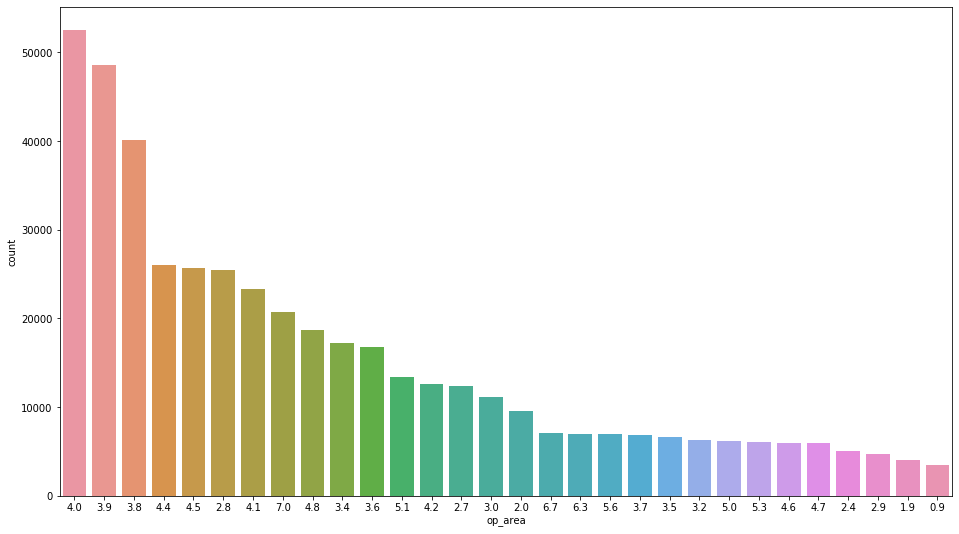

In [97]:
# Step 12: Plot a histogram using op_area
plt.figure(figsize=(16,9))
#plt.hist(raw_df['op_area'])
sns.countplot(raw_df['op_area']
             ,order = raw_df['op_area'].value_counts().index)
plt.show()

# Observations from above query
- Most orders come from a fulfillment centre of size 3.8 - 4.0

### Step 12: Perform UA on category with a countplot
We can also examine the distribution of the type of meals in the dataset.

Plot 'category' with a countplot. Change the plot size if need be.

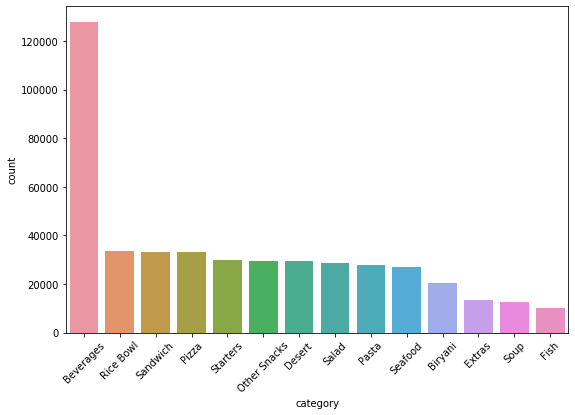

In [102]:
# Step 12: Plot a countplot using category
plt.figure(figsize=(9,6))
sns.countplot(raw_df['category']
             ,order = raw_df['category'].value_counts().index)
plt.xticks(rotation = 45) # rotate x-axis
plt.show()

# Observations from above query
- Counts of beverages outstrips the rest by almost 3x. Check if it is because meals are sold in packs.
- Rice bowl, sandwiches, pizzas are most popular meals

### Step 13: Perform UA on cuisine with a countplot
That's a lot of categories of food. But how about the cuisine ordered? 

Let's take a look at the distribution of cuisines ordered with a countplot.

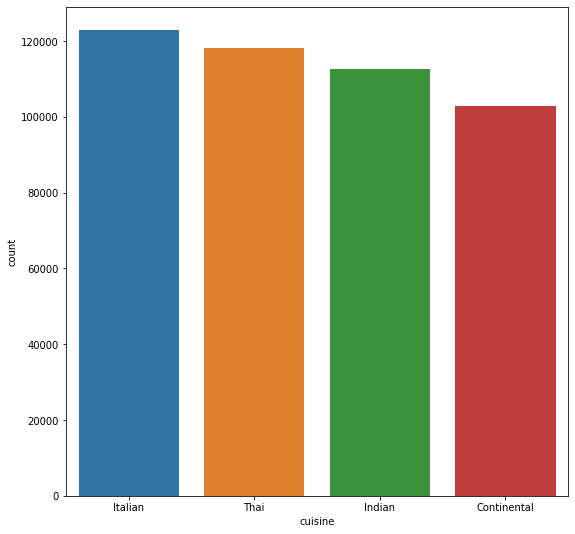

In [105]:
# Step 13: Plot a countplot using cuisine
plt.figure(figsize = (9,9))
sns.countplot(raw_df['cuisine'], order=raw_df['cuisine'].value_counts().index)
plt.show()

# Observations from above query
- Only 4 types of cuisines are served which does correspond to the prev query where we see most foods have approx same sales
- All cuisines are quite equal in sales
- But Italian is the highest & Continental is the lowest

### Step 14: Perform UA on num_orders with a histogram
Last but not least - num_orders throughout the entire dataset. 

Let's see what the overall distribution of the number of orders is across the dataset.

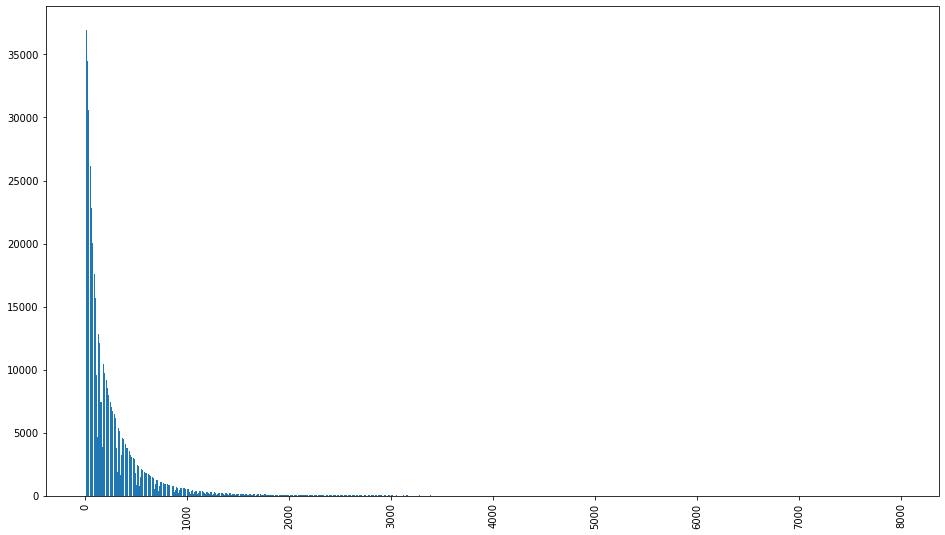

In [131]:
# Step 14: Plot a histogram using num_orders
plt.figure(figsize = (16, 9))
plt.hist(raw_df['num_orders'][raw_df['num_orders'] <= 8000], bins=800)
#sns.countplot(raw_df[raw_df['num_orders'] <= 5000])
plt.xticks(rotation = 90)
plt.show()

# Observations from above query
- Highest no. of orders are between 20 - 40, then moderating between 60 - 1000, and rarer ones are above 1000
- Seems like the bulk of customers are either big families or companies ordering food for employees
- It could also mean that min order is 20 or min order cost is usually the price of 20 orders

<details>
    <summary><font color='green'>What do you observe about the number of orders in the dataset? Click once to see if your guess is the same as ours</font></summary>
    <div><strong>The number of orders range mostly between 0 to 2500, but there are very huge outliers that go beyond 2500.</strong></div>
</details>

## Bivariate analysis
Now that we're done with the single columns, let's explore some of the relations between num_orders and other features. 

The choice of features chosen are arbitrary, so feel free to try some of your own combinations as well. 

### Step 15: Perform BA on num_orders vs checkout_price with a scatterplot
Is there a relationship between the checkout_price and the number of orders?

Let's find out with a scatterplot.

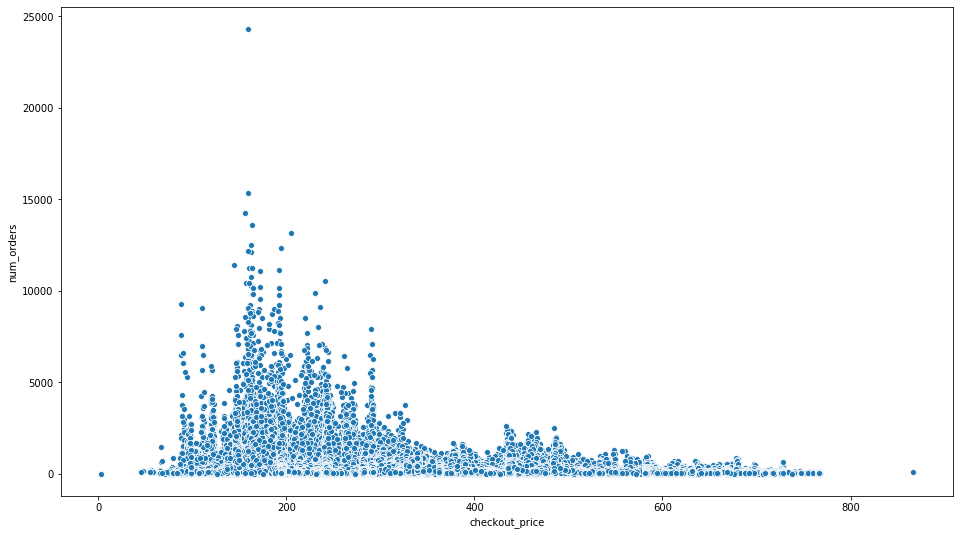

In [135]:
# Step 15: Plot a scatterplot using num_orders vs checkout_price
plt.figure(figsize=(16,9))
sns.scatterplot(x = raw_df['checkout_price'], y=raw_df['num_orders'])
plt.show()

# Observations from above query
- The range of prices are from 0 to approx 880
- The curve is right skewed because most checkout prices are between 80 to 300 and outliers after 800
- There is also an outlier at around the 170 mark with an order of approx 25000

<details>
    <summary><font color='green'>What do you observe about the relationship between the checkout_price and num_orders? Click once to see if your guess is the same as ours</font></summary>
    <div><strong>It does not look like there's a strong linear relationship.</strong></div>
</details>

### Step 16: Perform BA on num_orders vs center_type with a boxplot
How about the fulfilment center_type and the num_orders for each? Let's find out with a boxplot.

If your plot looks hard to read, that's because of outliers - there's a argument in your boxplot method to remove outliers from your boxplot.

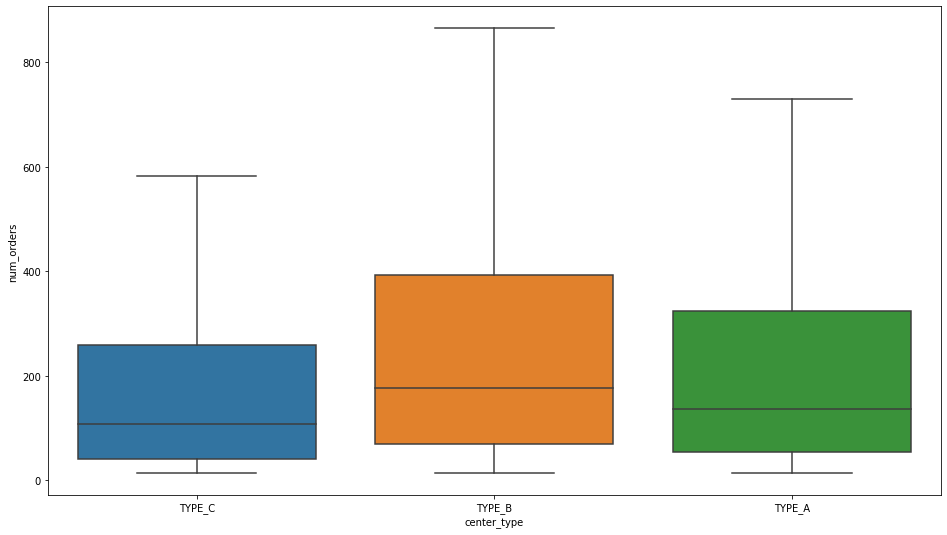

In [6]:
# Step 16: Plot a boxplot using num_orders vs center_type
plt.figure(figsize = (16,9))
sns.boxplot(x = raw_df['center_type'], y = raw_df['num_orders'], showfliers=False)

plt.show()

# Observations from above query
- If outliers are allowed, largest orders went to Type A
- If outliers are removed, 
 - Type B centers is used to handle the largest orders (850-0) vs (700-0)
 - >=25% orders from Type B is >=400 vs >=25% from Type A is only >=350 (when comparing Q4)


### Step 17: Perform BA on num_orders vs emailer_for_promotion with a boxplot
Does sending a promotion emailer help in increasing orders? Let's find out with a boxplot.

Don't forget to add an argument to not show the outliers.

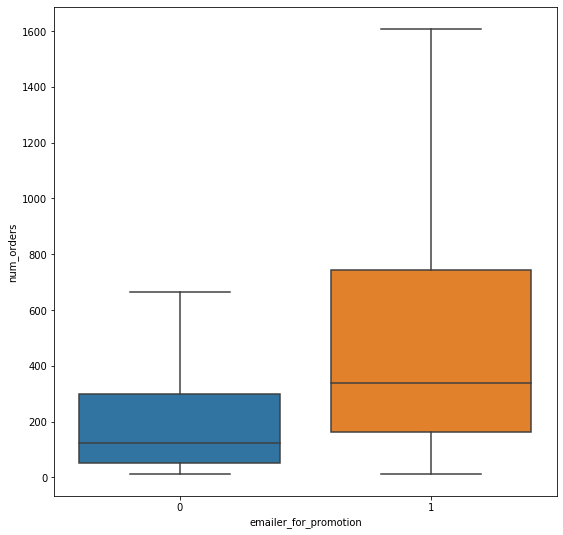

In [9]:
# Step 17: Plot a boxplot using num_orders vs emailer_for_promotion
plt.figure(figsize = (9,9))
sns.boxplot(x = raw_df['emailer_for_promotion'], y = raw_df['num_orders'], showfliers= False)
plt.show()

# Observations from above query
- No. of orders does increase when an emailer is sent because 75% of orders (Q2,Q3,Q4) have higher numbers than when no email
- The range of the boxplot with emailer is much larger than the one without (1600-0) vs (700-0)
- When comparing the medians, the boxplot with an emailer has a median closer to the max than 0

### Step 18: Perform a statistical test of difference between the groups for emailer_for_promotion
Seems like there <em>is</em> a difference between the two groups. Is the difference statistically different?

Let's use a Mann-Whitney U test of difference to test it out. We can use scipy.stats for this, more specifically the mannwhitneyu function.

Declare two variables:
1. num_orders from emailer_for_promotion = 0
2. num_orders from emailer_for_promotion = 1

You can then use the mannwhitneyu function - if the p value is less than 0.05, the two distributions have difference means.

In [5]:
# Step 18a: Get the num_orders from emailer_for_promotion = 0
x = raw_df[raw_df['emailer_for_promotion'] == 0]['num_orders']
# Step 18b: Get the num_orders from emailer_for_promotion = 1
y = raw_df[raw_df['emailer_for_promotion'] == 1]['num_orders']
# Step 18c: Use mannwhitneyu with the two variables
scipy.stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=4291410707.5, pvalue=0.0)

<details>
    <summary><font color='green'>Is there a difference between the number of orders associated with emailer promitions?</font></summary>
    <div><strong>Yes!</strong></div>
</details>

### Step 19: Perform BA on num_orders vs homepage_featured with a boxplot
Next, we see if featuring the food on the homepage had an effect on the number of orders.

Plot a boxplot with num_orders vs homepage_featured.

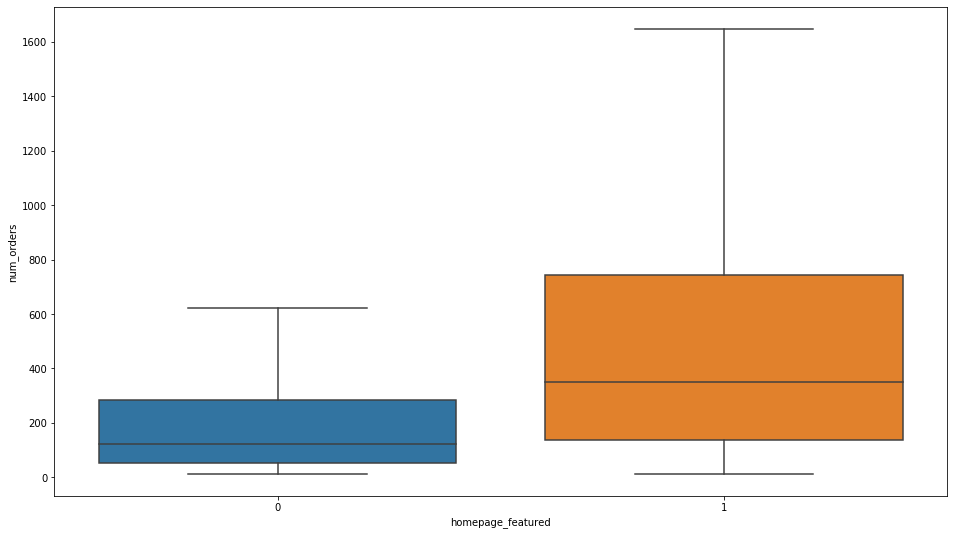

In [7]:
# Step 19: Plot a boxplot using num_orders vs hompage_featured
plt.figure(figsize=(16,9))
sns.boxplot(x = raw_df['homepage_featured'], y = raw_df['num_orders'], showfliers=False)
plt.show()

# Observations from above query
- Having a homepage feature increases num_of orders because:
- With a feature, the range of orders is much higher than without (1650-0) vs (600-0)
- With a feature, >=75% of orders have >=100 whereas without a feature the median (i.e. 50%) is at 100
- With a feature, the median is closer to max than to 0

### Step 20: Perform a statistical test of difference between the groups for homepage_featured
Similarly, let's perform a statistical test to see if the two groups are statistically different. 

Declare two variables:
1. num_orders from homepage_featured = 0
2. num_orders from homepage_featured = 1

Perform a test of difference with Mann-Whitney U test after this.

In [9]:
# Step 20a: Get the num_orders from homepage_featured = 0
x = raw_df[raw_df['homepage_featured'] == 0]['num_orders']
# Step 20b: Get the num_orders from homepage_featured = 1
y = raw_df[raw_df['homepage_featured'] == 1]['num_orders']
# Step 20c: Use mannwhitneyu with the two variables
scipy.stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=5768867174.0, pvalue=0.0)

### Step 21: Perform BA on num_orders vs category with a boxplot
Are some categories more popular than others on average per order? Let's find out with a boxplot.

The resulting plot might be a bit too small so don't forget to change the figure size.

In [19]:
# Sort the categories by median for prettier viz
med = raw_df[['category','num_orders']].groupby('category').median().sort_values(by='num_orders',ascending=False)
med.index

Index(['Rice Bowl', 'Sandwich', 'Salad', 'Extras', 'Beverages', 'Pizza',
       'Other Snacks', 'Starters', 'Fish', 'Soup', 'Seafood', 'Desert',
       'Pasta', 'Biryani'],
      dtype='object', name='category')

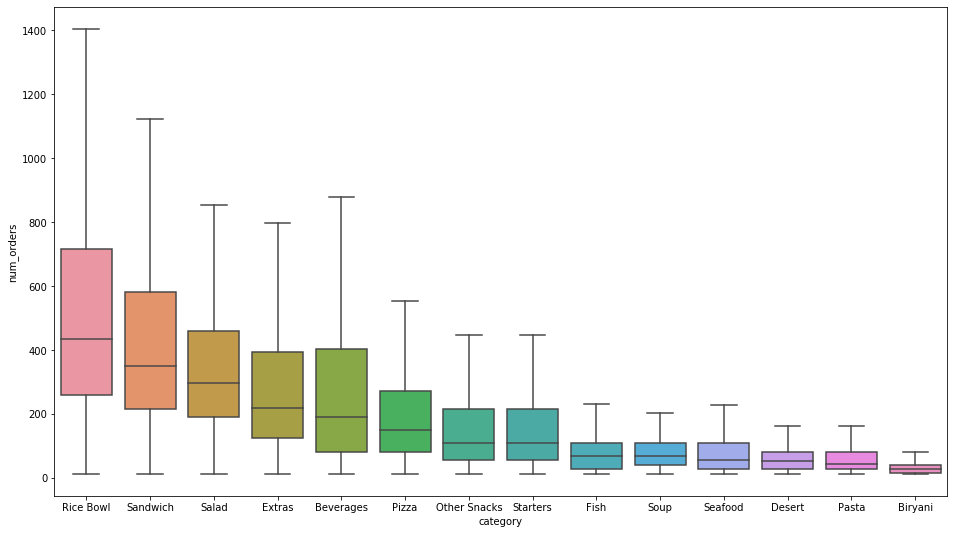

In [20]:
# Step 21: Plot a boxplot using num_orders vs category
plt.figure(figsize = (16,9))
sns.boxplot(x=raw_df['category'], y=raw_df['num_orders'], order=med.index,showfliers=False)
plt.show()

# Observations from above query
- Top favourites are Rice bowl and Sandwich as their order number Range and median is way above the rest
- Bottom 3 can consider to drop since they don't even hit 200 orders.

### Step 22: Perform BA on num_orders vs op_area with a scatterplot
Does the area of operations have anything to do with the eventual number of orders?

Let's find out with a scatter plot, with num_orders vs op_area.

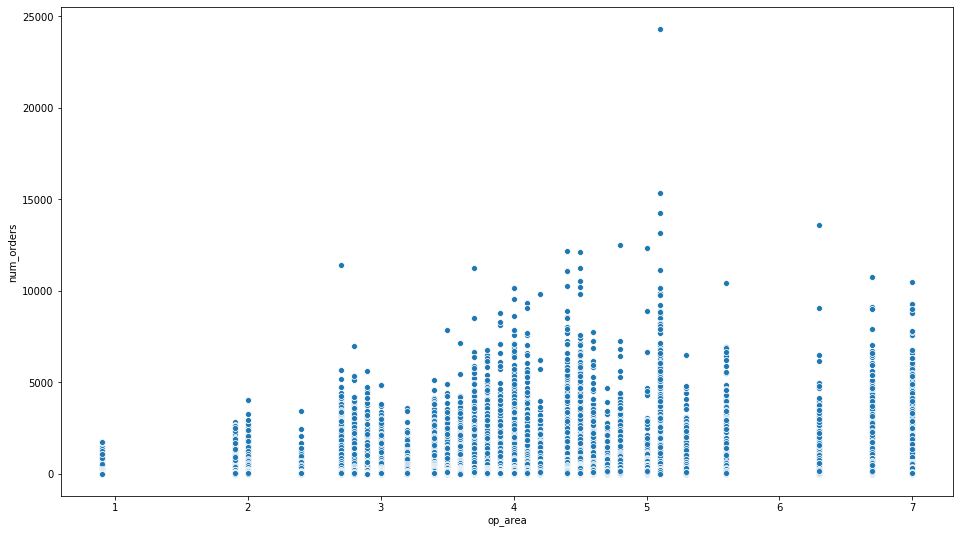

In [21]:
# Step 22: Plot num_orders vs op_area with a scatterplot
plt.figure(figsize=(16,9))
sns.scatterplot(x=raw_df['op_area'], y=raw_df['num_orders'])
plt.show()

# Observations from above query
- Moderately non-linear relationship since num_orders doesn't seem to grow with op_area (e.g. num_orders in 7 is same as 5)
- Or it could be interpreted that after op_area of 5, further increase in area doesn't help much

# End of Part II
In this Part, we used visualization to examine the values in each column. We also used visualizatio to examine the relationship between num_orders and a few selected features.

In the next Part, we'll still use visualization, but we'll manipulate the DataFrame a bit more to answer business-related questions.

## Additional

In [ ]:
# What is the relationship btwn center_type/op_area with cuisine? Are some centers used for diff cuisine?